In [60]:
import backend.algorithms as algo
import backend.data_gen as data_gen
import numpy as np
import matplotlib.pyplot as plt

In [61]:
sites_dict = ['111',
'112',
'113',
'121',
'122',
'123',
'131',
'132',
'133',
'211',
'212',
'213',
'221',
'222',
'223',
'231',
'232',
'233',
'311',
'312',
'313',
'321',
'322',
'323',
'331',
'332',
'333']

In [68]:
website_data_5 = list(data_gen.generate_data(20000,sites_dict[:5],-0.5,-0.5,0.05).values())
website_data_12 = list(data_gen.generate_data(20000,sites_dict[:12],-0.5,-0.5,0.05).values())
website_data_25= list(data_gen.generate_data(20000,sites_dict[:25],-0.5,-0.5,0.05).values())

In [72]:
for i in website_data_25:
    print(i.p)

0.16898712974176236
0.1776995290853592
0.08008895276063971
0.19011368012676672
0.1681461021059721
0.2469089201586226
0.2285055324812383
0.1047346360874024
0.24518822087132008
0.20971464976081536
0.24227340049530924
0.15728796851771287
0.19462052327578316
0.1277566722312285
0.20549223251211277
0.2142258995611291
0.162288018476334
0.12787247680818897
0.17242534138302507
0.1742487937127009
0.22769212475004735
0.1646256377045268
0.15663071936501852
0.17678268812826392
0.18248532986824134


In [73]:
remaining_sites = []
data = []
for idx, test in enumerate(range(100)):
    website_data = list(data_gen.generate_data(20000,sites_dict[:5],0.01,0.1,0.1).values())
    remaining_sites.append(algo.succesive_elimination(website_data,20000,0.95))
    data.append(website_data)

In [74]:
def check_correct_return(all_sites):
    current_best_site = None
    for site in all_sites.values():
        if (current_best_site.p < site.p):
            current_best_site = site
    
def calc_simpel_regret(best_sites,all_sites):
    p_max = max(site.p for site in all_sites)
    totalregret = 0
    for site in best_sites:
        totalregret+=(p_max - site.p)
    return totalregret

In [170]:
website_data = list(data_gen.generate_data(100000,sites_dict[:2],0.01,0.1,0.1).values())

In [183]:
def run_website_analysis(number_of_website, budget,website_data):
    remaining_sites = []
    data = []
    for idx in range(100):
        for site in website_data:
            site.reset()
        remaining_sites.append(algo.succesive_elimination(website_data,budget,0.95))
        data.append(website_data)
       

    remaining_sites_length = []
    simpel_regret = []
    simpel_regret_best_only = []
    for idx, rem in enumerate(remaining_sites):
        remaining_sites_length.append(len(rem))
        simpel_regret.append(calc_simpel_regret(rem,data[idx]))
        simpel_regret_best_only.append(calc_simpel_regret([rem[0]],data[idx]))

    return simpel_regret,simpel_regret_best_only,remaining_sites_length

In [195]:
budget = 1000
for site in website_data:
    site.reset()
hallo = algo.succesive_elimination(website_data, budget, 0.95)
print(hallo)

[<backend.data_gen.Website object at 0x7fe6f8a8e6a0>, <backend.data_gen.Website object at 0x7fe6eb77fd90>]


In [205]:
len(website_data[0].realisations)

100000

In [212]:
budget = 100000
while True:
    for site in website_data:
        site.__init__(site.name,site.p,site.realisations)
    result = algo.succesive_elimination(website_data, budget, 0.95)
    if len(result) == 1: break
    budget += 1000
print(budget)

TypeError: list indices must be integers or slices, not str

In [188]:
simpel_regret,simpel_regret_best,remaining_sites = run_website_analysis(2,100000,website_data)

In [191]:
simpel_regret

[0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.00956994448170484,
 0.0095699

In [168]:
simpel_regret_5_80000.count(0)

68

In [169]:
a = run_website_analysis(2,100000)

KeyboardInterrupt: 

In [99]:
simpel_regret_5_10000,simpel_regret_best_only_5_10000,remaining_sites_length_5_10000 = run_website_analysis(5,10000)
simpel_regret_5_20000,simpel_regret_best_only_5_20000,remaining_sites_length_5_20000 = run_website_analysis(5,20000)
simpel_regret_5_40000,simpel_regret_best_only_5_40000,remaining_sites_length_5_40000 = run_website_analysis(5,40000)
simpel_regret_5_80000,simpel_regret_best_only_5_80000,remaining_sites_length_5_80000 = run_website_analysis(5,80000)

In [161]:
simpel_regret_best_only_5_80000

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0011448036432151198,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01278694251431356,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01753378798505234,
 0.02696524349172502,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.026348750705275426,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0013655400702434761,
 0.0,
 0.011042451663491937,
 0.0,
 0.0,
 0.0,
 0.03757569756586987,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.030759153279771967,
 0.0,
 0.0,
 0.03367894047463105,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004615584247046445,
 0.0,
 0.008924414908352496,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00579612406855734,
 0.0]

Text(0, 0.5, 'Number of website groups')

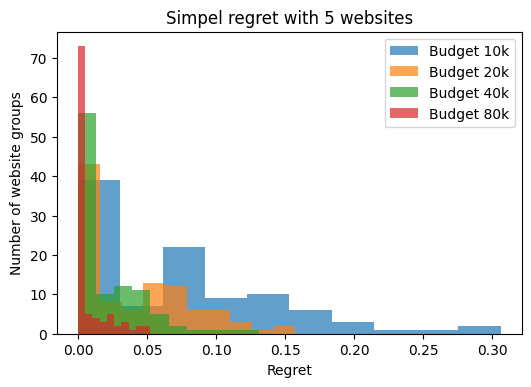

In [214]:
plt.figure(dpi=100)
plt.hist(simpel_regret_5_10000,label = 'Budget 10k',alpha = 0.7)
plt.hist(simpel_regret_5_20000,label = 'Budget 20k',alpha = 0.7)
plt.hist(simpel_regret_5_40000,label = 'Budget 40k',alpha = 0.7)
plt.hist(simpel_regret_5_80000,label = 'Budget 80k',alpha = 0.7)
plt.legend()
plt.title('Simpel regret with 5 websites')
plt.xlabel('Regret')
plt.ylabel('Number of website groups')

In [217]:
simpel_regret_5_80000.count(0)

68

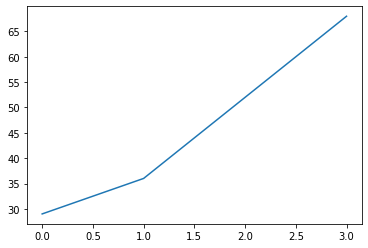

In [219]:
import plotly.graph_objects as go

a = [simpel_regret_5_10000.count(0),simpel_regret_5_20000.count(0),simpel_regret_5_40000.count(0),simpel_regret_5_80000.count(0)]
plt.plot(a)

In [125]:
import plotly

In [127]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

Text(0, 0.5, 'Number of website groups')

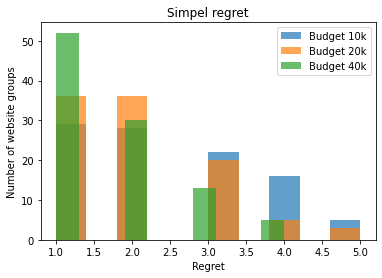

In [124]:
plt.hist(remaining_sites_length_5_10000,label = 'Budget 10k',alpha = 0.7)
plt.hist(remaining_sites_length_5_20000,label = 'Budget 20k',alpha = 0.7)
plt.hist(remaining_sites_length_5_40000,label = 'Budget 40k',alpha = 0.7)
plt.legend()
plt.title('Simpel regret')
plt.xlabel('Regret')
plt.ylabel('Number of website groups')